<a href="https://colab.research.google.com/github/yuyinglu2000/Sepsis-Mortality/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import lightgbm as lgb

# **Data Preprocessing**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/534 team6/bq-results-20231205-053950-1701755207682.csv')

In [ ]:
df.shape

(808188, 43)

In [ ]:
# regroup the race
race_mapping = {
    'WHITE': 'White',
    'HISPANIC OR LATINO': 'Hispanic or Latin',
    'BLACK/AFRICAN AMERICAN': 'Black or African American',
    'BLACK/CARIBBEAN ISLAND': 'Black or African American',
    'HISPANIC/LATINO - DOMINICAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - CENTRAL AMERICAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - GUATEMALAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - PUERTO RICAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - SALVADORAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - HONDURAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - MEXICAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - CUBAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - COLUMBIAN': 'Hispanic or Latin',
    'BLACK/CAPE VERDEAN': 'Black or African American',
    'BLACK/AFRICAN': 'Black or African American',
    'SOUTH AMERICAN': 'Hispanic or Latin',
    'WHITE - BRAZILIAN': 'Hispanic or Latin',
    'WHITE - OTHER EUROPEAN': 'White',
    'WHITE - RUSSIAN': 'White',
    'WHITE - EASTERN EUROPEAN': 'White',
    'ASIAN': 'Others race',
    'ASIAN - SOUTH EAST ASIAN': 'Others race',
    'ASIAN - CHINESE': 'Others race',
    'ASIAN - ASIAN INDIAN': 'Others race',
    'ASIAN - KOREAN': 'Others race',
    'AMERICAN INDIAN/ALASKA NATIVE': 'Others race',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Others race',
    'MULTIPLE RACE/ETHNICITY': 'Others race',
    'PORTUGUESE': 'Others race',
    'UNKNOWN': 'Others race',
    'OTHER': 'Others race',
    'UNABLE TO OBTAIN': 'Others race',
    'PATIENT DECLINED TO ANSWER': 'Others race'
}

df['race'] = df['race'].map(race_mapping)


In [ ]:
df['antibiotic'].unique()

array(['Sulfameth/Trimethoprim Suspension', 'Meropenem', 'Vancomycin',
       'Sulfameth/Trimethoprim DS', 'Neomycin/Polymyxin B Sulfate',
       'Gentamicin Sulfate', 'Vancomycin Oral Liquid',
       'Sulfameth/Trimethoprim SS', nan, 'Linezolid',
       'Tobramycin Sulfate', 'Sulfamethoxazole-Trimethoprim',
       'Streptomycin Sulfate', 'Vancomycin Antibiotic Lock',
       'Sulfameth/Trimethoprim', 'Penicillin G Benzathine',
       'Tetracycline', 'Penicillin G Potassium', 'Vancomycin Enema',
       'Tetracycline HCl', 'Penicillin V Potassium',
       'Meropenem Graded Challenge', 'Neomycin Sulfate',
       'Vancomycin Intrathecal', 'Vancomycin Ora', 'Linezolid Suspension',
       'Sulfameth/Trimethoprim '], dtype=object)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# df = ... (your DataFrame)

# Define a mapping for antibiotics to their respective groups
antibiotic_mapping = {
    'Gentamicin Sulfate': 'Aminoglycoside',
    'Tobramycin Sulfate': 'Aminoglycoside',
    'Streptomycin Sulfate': 'Aminoglycoside',
    'Neomycin Sulfate': 'Aminoglycoside',
    'Neomycin/Polymyxin B Sulfate': 'Aminoglycoside',
    'Meropenem': 'Carbapenem',
    'Meropenem Graded Challenge': 'Carbapenem',
    'Vancomycin': 'Glycopeptide',
    'Vancomycin Oral Liquid': 'Glycopeptide',
    'Vancomycin Antibiotic Lock': 'Glycopeptide',
    'Vancomycin Enema': 'Glycopeptide',
    'Vancomycin Intrathecal': 'Glycopeptide',
    'Vancomycin Ora': 'Glycopeptide',
    'Linezolid': 'Oxazolidinone',
    'Linezolid Suspension': 'Oxazolidinone',
    'Penicillin G Benzathine': 'Penicillin',
    'Penicillin G Potassium': 'Penicillin',
    'Penicillin V Potassium': 'Penicillin',
    'Sulfameth/Trimethoprim': 'Sulfonamide',
    'Sulfameth/Trimethoprim DS': 'Sulfonamide',
    'Sulfameth/Trimethoprim SS': 'Sulfonamide',
    'Sulfamethoxazole-Trimethoprim': 'Sulfonamide',
    'Sulfameth/Trimethoprim Suspension': 'Sulfonamide',
    'Tetracycline': 'Tetracycline',
    'Tetracycline HCl': 'Tetracycline'
    # Add more mappings as needed
}

# Applying the mapping to the 'antibiotic' column
df['antibiotic'] = df['antibiotic'].map(antibiotic_mapping)


In [ ]:
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)
df_dropped = df_encoded.dropna()
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791959 entries, 0 to 808187
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   subject_id                      791959 non-null  int64  
 1   hospital_expire_flag            791959 non-null  int64  
 2   max_age                         791959 non-null  int64  
 3   los_icu                         791959 non-null  float64
 4   first_hosp_stay                 791959 non-null  bool   
 5   suspected_infection             791959 non-null  int64  
 6   sofa_score                      791959 non-null  int64  
 7   sepsis3                         791959 non-null  bool   
 8   avg_urineoutput                 791959 non-null  float64
 9   temperature_min                 791959 non-null  float64
 10  temperature_max                 791959 non-null  float64
 11  temperature_avg                 791959 non-null  float64
 12  glucose_min     

In [ ]:
empty_values = df_dropped['antibiotic_Tetracycline'].isnull().any()
empty_values

False

In [ ]:
df.info

<bound method DataFrame.info of         subject_id  hospital_expire_flag   race  max_age  los_icu  \
0         11714491                     1  White       68     4.96   
1         11714491                     1  White       68     4.96   
2         11714491                     1  White       68     4.96   
3         11714491                     1  White       68     4.96   
4         11714491                     1  White       68     4.96   
...            ...                   ...    ...      ...      ...   
808183    11714491                     1  White       68     4.96   
808184    11714491                     1  White       68     4.96   
808185    11714491                     1  White       68     4.96   
808186    11714491                     1  White       68     4.96   
808187    11714491                     1  White       68     4.96   

        first_hosp_stay  suspected_infection  sofa_score  sepsis3  \
0                  True                    1           4     True   
1

# **drop duplications**

In [ ]:
duplicated_rows_mask = df_dropped['subject_id'].duplicated(keep=False)

# Extract the duplicated rows
duplicated_rows = df_dropped[duplicated_rows_mask]
new_data  = df_dropped.drop_duplicates()
duplicated_rows_mask = new_data['subject_id'].duplicated(keep=False)

# Extract the duplicated rows
duplicated_rows = new_data[duplicated_rows_mask]
# Separate out columns based on data types
int_float_cols = new_data.select_dtypes(include=['int64', 'float64']).columns
uint8_cols = new_data.select_dtypes(include=['uint8']).columns

# Sort dataframe
# For int and float columns: sort in descending order so that larger values come first
df = new_data.sort_values(by=list(int_float_cols), ascending=False)

# For uint8 columns: sort in descending order so that 1 comes before 0
df = df.sort_values(by=list(uint8_cols), ascending=False)

# Drop duplicates based on subject_id, keeping the first (which are the desired rows after sorting)
df_reduced = df.drop_duplicates(subset='subject_id', keep='first')

# Reset index if needed
df_reduced = df_reduced.reset_index(drop=True)
pd.set_option('display.max_columns', None)
df_reduced

,subject_id,hospital_expire_flag,max_age,los_icu,first_hosp_stay,suspected_infection,sofa_score,sepsis3,avg_urineoutput,temperature_min,temperature_max,temperature_avg,glucose_min,glucose_max,glucose_average,sodium_max,sodium_min,sodium_average,diabetes_without_cc,diabetes_with_cc,severe_liver_disease,aids,renal_disease,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,spo2_min,spo2_max,spo2_mean,coma,albumin,race_Black or African American,race_Hispanic or Latin,race_Others race,race_White,antibiotic_Aminoglycoside,antibiotic_Carbapenem,antibiotic_Glycopeptide,antibiotic_Oxazolidinone,antibiotic_Penicillin,antibiotic_Sulfonamide,antibiotic_Tetracycline,gender_F,gender_M
0,19700990,0,45,2.58,True,1,2,True,303.571429,37.1,37.6,37.35,99.0,150.0,124.000000,145.0,135.0,139.000000,0,0,0,0,0,83,136,107.712121,62.0,155.0,108.487662,44.0,94.0,68.273208,7.0,26.0,16.117967,97,100,99.075736,0.0,4.3,1,0,0,0,1,0,0,0,0,0,0,1,0
1,19131048,1,82,31.38,True,1,8,True,181.015152,35.0,35.0,35.00,50.0,1260.0,198.500000,150.0,132.0,142.100000,0,0,0,0,0,57,167,86.461430,61.0,162.0,109.499805,38.0,137.0,58.859758,12.0,42.0,22.494977,73,100,98.499899,1.0,3.6,1,0,0,0,1,0,0,0,0,0,0,1,0
2,18860018,0,79,6.67,True,1,3,True,131.871795,35.8,36.7,36.25,89.0,89.0,89.000000,149.0,143.0,146.000000,1,0,0,0,0,47,92,70.838141,53.0,130.0,103.522544,27.0,88.0,52.078905,12.0,31.5,18.342949,91,100,97.765734,0.0,2.9,1,0,0,0,1,0,0,0,0,0,0,1,0
3,18676703,0,68,2.67,True,1,5,True,314.555556,37.6,37.6,37.60,41.0,1369.0,455.923077,145.0,118.0,132.480769,1,1,0,0,1,57,131,96.754308,58.0,228.0,129.624302,32.0,137.0,65.587028,4.0,66.0,17.748034,88,100,98.385557,1.0,3.6,1,0,0,0,1,0,0,0,0,0,0,1,0
4,18300024,1,53,8.54,True,1,12,True,27.500000,37.3,38.2,37.75,95.0,195.0,145.166667,140.0,135.0,137.166667,0,0,1,0,0,61,99,81.085728,81.0,129.0,103.137531,39.0,92.0,51.626111,8.0,36.0,20.688266,92,100,97.345958,1.0,3.2,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,10125966,0,90,1.04,True,1,2,True,35.909091,37.0,37.0,37.00,174.0,182.0,178.000000,135.0,133.0,134.000000,0,0,0,0,1,76,107,88.958333,78.0,127.0,106.960000,39.0,74.0,50.840000,14.0,28.0,21.000000,96,100,97.916667,0.0,3.5,0,0,0,1,0,0,0,0,0,0,0,0,1
6397,10123231,0,65,2.00,True,1,3,True,165.500000,38.1,38.1,38.10,129.0,178.0,153.500000,139.0,136.0,137.500000,1,0,0,0,0,79,124,100.357143,83.5,161.0,103.500000,45.0,103.0,60.304878,7.0,29.0,17.046512,93,100,98.476190,0.0,4.1,0,0,0,1,0,0,0,0,0,0,0,0,1
6398,10051990,0,55,1.63,True,1,8,True,172.000000,36.7,36.7,36.70,71.0,106.0,88.500000,139.0,136.0,137.500000,1,0,1,0,0,85,100,92.315789,84.0,131.0,105.333333,42.0,75.0,60.133333,15.0,24.0,17.815789,93,99,95.382353,0.0,3.1,0,0,0,1,0,0,0,0,0,0,0,0,1
6399,10030579,0,65,1.04,True,1,4,True,175.000000,36.8,36.8,36.80,77.0,170.0,116.000000,145.0,139.0,142.250000,0,0,0,0,0,71,125,99.300000,72.0,178.0,143.005792,46.0,116.0,75.275097,12.0,35.0,18.971639,90,100,98.586039,0.0,3.2,0,0,0,1,0,0,0,0,0,0,0,0,1


# **Model Training**

In [ ]:
X = df_reduced.drop(columns=['hospital_expire_flag','subject_id','first_hosp_stay','suspected_infection','sepsis3'])
y = df_reduced['hospital_expire_flag']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
count_of_ones = y.sum()

count_of_ones

1836

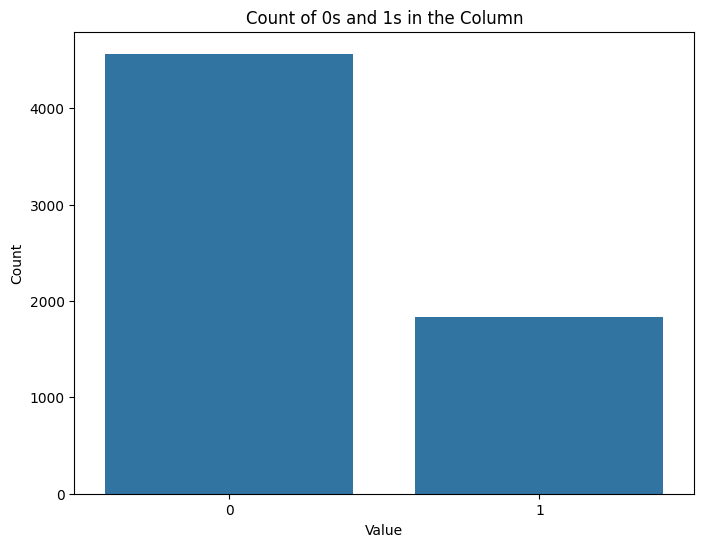

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y' is your column and 'df' is your DataFrame
total_rows = len(df_reduced)
count_of_ones = y.sum()
count_of_zeros = total_rows - count_of_ones

# Preparing data for the bar chart
data = {'Count': [count_of_zeros, count_of_ones], 'Value': ['0', '1']}

# Creating the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Value', y='Count', data=data)
plt.title('Count of 0s and 1s in the Column')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

classifiers = {
    'SVC': SVC(probability=True, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'MLP': MLPClassifier(random_state=42),
    'XGB': XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LGBM': lgb.LGBMClassifier(n_estimators=100, random_state=42)
}

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

def f2_score(precision, recall):
    return 5 * (precision * recall) / ((4 * precision) + recall)

# Iterating through each classifier
for name, clf in classifiers.items():
    # Fit model
    clf.fit(X_train, y_train)

    # Predict probabilities and labels
    y_scores_test = clf.predict_proba(X_test)[:, 1]
    y_pred_binary = (y_scores_test > 0.5).astype(int)

    # Calculate metrics
    auc_test = roc_auc_score(y_test, y_scores_test)
    accuracy_test = accuracy_score(y_test, y_pred_binary)
    f1_test = f1_score(y_test, y_pred_binary)
    precision_test = precision_score(y_test, y_pred_binary)
    recall_test = recall_score(y_test, y_pred_binary)
    f2_test = f2_score(precision_test, recall_test)

    # Print results
    print(f"{name}: Test AUC = {auc_test:.4f}, Test Accuracy = {accuracy_test:.4f}, "
          f"F1 Score = {f1_test:.4f}, Precision = {precision_test:.4f}, "
          f"Recall = {recall_test:.4f}, F2 Score = {f2_test:.4f}")

SVC: Test AUC = 0.7277, Test Accuracy = 0.6654, F1 Score = 0.6462, Precision = 0.6772, Recall = 0.6179, F2 Score = 0.6289
DecisionTree: Test AUC = 0.7329, Test Accuracy = 0.7327, F1 Score = 0.7345, Precision = 0.7219, Recall = 0.7475, F2 Score = 0.7422
RandomForest: Test AUC = 0.9309, Test Accuracy = 0.8516, F1 Score = 0.8480, Precision = 0.8591, Recall = 0.8372, F2 Score = 0.8415
GradientBoosting: Test AUC = 0.9060, Test Accuracy = 0.8133, F1 Score = 0.8009, Precision = 0.8469, Recall = 0.7597, F2 Score = 0.7757
MLP: Test AUC = 0.8763, Test Accuracy = 0.7804, F1 Score = 0.7899, Precision = 0.7495, Recall = 0.8350, F2 Score = 0.8164
XGB: Test AUC = 0.9192, Test Accuracy = 0.8401, F1 Score = 0.8358, Precision = 0.8491, Recall = 0.8228, F2 Score = 0.8279
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3662, number of negative: 3642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

def f2_score(precision, recall):
    return 5 * (precision * recall) / ((4 * precision) + recall)

# Iterating through each classifier
for name, clf in classifiers.items():
    # Fit model on training data
    clf.fit(X_train, y_train)

    # Predict probabilities and labels for both train and test datasets
    y_scores_train = clf.predict_proba(X_train)[:, 1]
    y_pred_binary_train = (y_scores_train > 0.5).astype(int)

    y_scores_test = clf.predict_proba(X_test)[:, 1]
    y_pred_binary_test = (y_scores_test > 0.5).astype(int)

    # Calculate metrics for train dataset
    auc_train = roc_auc_score(y_train, y_scores_train)
    accuracy_train = accuracy_score(y_train, y_pred_binary_train)
    f1_train = f1_score(y_train, y_pred_binary_train)
    precision_train = precision_score(y_train, y_pred_binary_train)
    recall_train = recall_score(y_train, y_pred_binary_train)
    sensitivity_train = recall_train  # Sensitivity is the same as Recall
    f2_train = f2_score(precision_train, recall_train)

    # Calculate metrics for test dataset
    auc_test = roc_auc_score(y_test, y_scores_test)
    accuracy_test = accuracy_score(y_test, y_pred_binary_test)
    f1_test = f1_score(y_test, y_pred_binary_test)
    precision_test = precision_score(y_test, y_pred_binary_test)
    recall_test = recall_score(y_test, y_pred_binary_test)
    sensitivity_test = recall_test  # Sensitivity is the same as Recall
    f2_test = f2_score(precision_test, recall_test)

    # Print results for both train and test datasets
    print(f"{name}: Train AUC = {auc_train:.4f}, Train Accuracy = {accuracy_train:.4f}, "
          f"Train F1 Score = {f1_train:.4f}, Train Precision = {precision_train:.4f}, "
          f"Train Recall = {recall_train:.4f}, Train Sensitivity = {sensitivity_train:.4f}, Train F2 Score = {f2_train:.4f}")

    print(f"{name}: Test AUC = {auc_test:.4f}, Test Accuracy = {accuracy_test:.4f}, "
          f"Test F1 Score = {f1_test:.4f}, Test Precision = {precision_test:.4f}, "
          f"Test Recall = {recall_test:.4f}, Test Sensitivity = {sensitivity_test:.4f}, Test F2 Score = {f2_test:.4f}")




SVC: Train AUC = 0.7680, Train Accuracy = 0.6919, Train F1 Score = 0.6795, Train Precision = 0.7102, Train Recall = 0.6513, Train Sensitivity = 0.6513, Train F2 Score = 0.6623
SVC: Test AUC = 0.7277, Test Accuracy = 0.6654, Test F1 Score = 0.6462, Test Precision = 0.6772, Test Recall = 0.6179, Test Sensitivity = 0.6179, Test F2 Score = 0.6289
DecisionTree: Train AUC = 1.0000, Train Accuracy = 1.0000, Train F1 Score = 1.0000, Train Precision = 1.0000, Train Recall = 1.0000, Train Sensitivity = 1.0000, Train F2 Score = 1.0000
DecisionTree: Test AUC = 0.7329, Test Accuracy = 0.7327, Test F1 Score = 0.7345, Test Precision = 0.7219, Test Recall = 0.7475, Test Sensitivity = 0.7475, Test F2 Score = 0.7422
RandomForest: Train AUC = 1.0000, Train Accuracy = 1.0000, Train F1 Score = 1.0000, Train Precision = 1.0000, Train Recall = 1.0000, Train Sensitivity = 1.0000, Train F2 Score = 1.0000
RandomForest: Test AUC = 0.9309, Test Accuracy = 0.8516, Test F1 Score = 0.8480, Test Precision = 0.8591, T

# **AUC & ROC**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
import numpy as np

num_folds = 5  # Reduced number of folds for faster execution
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

auc_scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')

# Select five specific models
selected_classifiers = {
    'SVC': classifiers['SVC'],
    'DecisionTree' : classifiers['DecisionTree'],
    'RandomForest': classifiers['RandomForest'],
    'GradientBoosting': classifiers['GradientBoosting'],
    'XGB': classifiers['XGB'],
    'MLP': classifiers['MLP'],
    'LGBM': classifiers['LGBM']
}

results = {}
for name, clf in selected_classifiers.items():
    scores = cross_validate(clf, X_smote, y_smote, cv=kf, scoring={'auc': auc_scorer}, n_jobs=-1)
    results[name] = {'AUC': np.mean(scores['test_auc'])}

# Print results
for name, metrics in results.items():
    print(f"{name}: AUC = {metrics['AUC']:.4f}")

SVC: AUC = 0.7562
DecisionTree: AUC = 0.7569
RandomForest: AUC = 0.9336
GradientBoosting: AUC = 0.9113
XGB: AUC = 0.9231
MLP: AUC = 0.8859
LGBM: AUC = 0.9235


***Confidence Interval***

In [ ]:
from scipy.stats import sem, t
from sklearn.model_selection import cross_val_score
import numpy as np

confidence_level = 0.95
degrees_freedom = 5 - 1  # degrees of freedom for t-distribution
t_critical = t.ppf((1 + confidence_level) / 2, degrees_freedom)  # t-critical value for 95% CI

results_with_confidence_interval = {}

for name, clf in selected_classifiers.items():
    # Get cross-validated scores for each metric
    auc_scores = cross_val_score(clf, X_smote, y_smote, cv=kf, scoring=auc_scorer, n_jobs=-1)


    # Calculate means
    auc_mean = np.mean(auc_scores)


    # Calculate standard errors
    auc_sem = sem(auc_scores)

    # Calculate confidence intervals
    auc_conf_interval = (auc_mean - t_critical * auc_sem, auc_mean + t_critical * auc_sem)
    # acc_conf_interval = (acc_mean - t_critical * acc_sem, acc_mean + t_critical * acc_sem)

    # Store the results
    results_with_confidence_interval[name] = {
        'AUC Mean': auc_mean,
        'AUC 95% CI': auc_conf_interval
        # 'Accuracy Mean': acc_mean,
        # 'Accuracy 95% CI': acc_conf_interval
    }

# Print the results with confidence intervals
for name, metrics in results_with_confidence_interval.items():
    print(f"{name}: AUC = {metrics['AUC Mean']:.4f} (95% CI: {metrics['AUC 95% CI']})")
    # print(f"{name}: Accuracy = {metrics['Accuracy Mean']:.4f} (95% CI: {metrics['Accuracy 95% CI']})")


SVC: AUC = 0.7562 (95% CI: (0.7342227978946837, 0.7781348064075672))
DecisionTree: AUC = 0.7569 (95% CI: (0.7354842859661843, 0.7782257193819822))
RandomForest: AUC = 0.9336 (95% CI: (0.9281694327828731, 0.939069091147622))
GradientBoosting: AUC = 0.9113 (95% CI: (0.9026693185941768, 0.920003781389553))
XGB: AUC = 0.9231 (95% CI: (0.9158348999151189, 0.9303265407788499))
MLP: AUC = 0.8859 (95% CI: (0.8791818749771981, 0.8926835628532309))
LGBM: AUC = 0.9235 (95% CI: (0.9171392987457779, 0.9299191129945724))


***visualization***

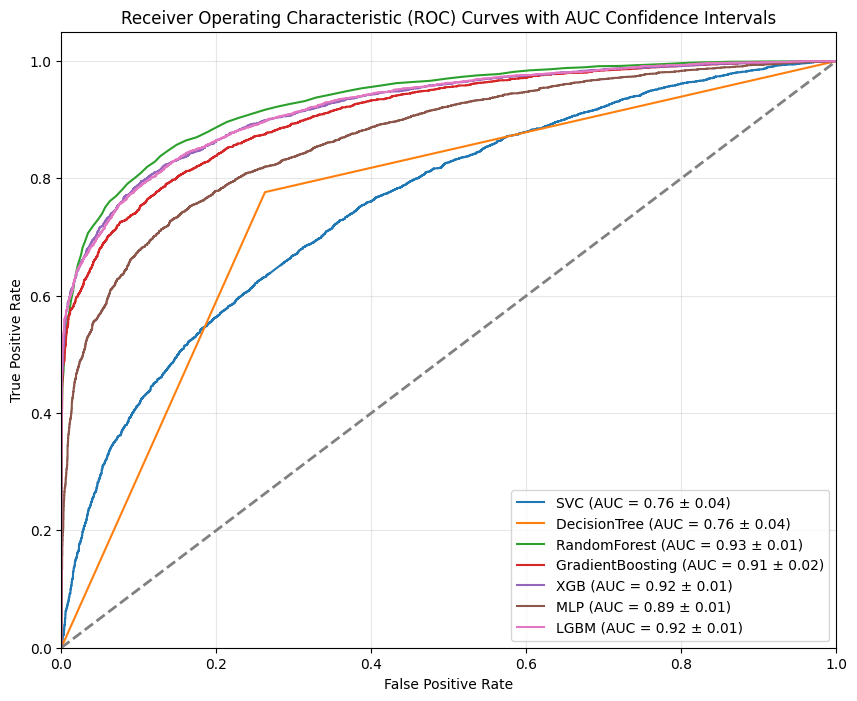

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

selected_classifiers = {
    'SVC': classifiers['SVC'],
    'DecisionTree' : classifiers['DecisionTree'],
    'RandomForest': classifiers['RandomForest'],
    'GradientBoosting': classifiers['GradientBoosting'],
    'XGB': classifiers['XGB'],
    'MLP': classifiers['MLP'],
    'LGBM': classifiers['LGBM']
}

# Define a dictionary to store ROC curve data for each classifier
roc_curves = {}

# Loop through selected classifiers
for name, clf in selected_classifiers.items():
    # Perform cross-validation and get predicted probabilities
    y_scores = cross_val_predict(clf, X_smote, y_smote, cv=kf, method='predict_proba', n_jobs=-1)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_smote, y_scores)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve data in the dictionary
    roc_curves[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

plt.figure(figsize=(10, 8))

for name, roc_curve_data in roc_curves.items():
    fpr, tpr, roc_auc = roc_curve_data['fpr'], roc_curve_data['tpr'], roc_curve_data['roc_auc']
    mean_auc = results_with_confidence_interval[name]['AUC Mean']
    lower, upper = results_with_confidence_interval[name]['AUC 95% CI']

    # Modify the label string to include AUC and confidence interval
    label = f'{name} (AUC = {mean_auc:.2f} ± {upper - lower:.2f})'

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=label)



# Plot the random chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves with AUC Confidence Intervals')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


SVC: CV AUC Mean = 0.7586, CV Accuracy Mean = 0.6881, CV F1 Score Mean = 0.6767, CV Precision Mean = 0.7045, CV Recall Mean = 0.6510, CV Sensitivity Mean = 0.6510
DecisionTree: CV AUC Mean = 0.7621, CV Accuracy Mean = 0.7622, CV F1 Score Mean = 0.7664, CV Precision Mean = 0.7551, CV Recall Mean = 0.7780, CV Sensitivity Mean = 0.7780
RandomForest: CV AUC Mean = 0.9293, CV Accuracy Mean = 0.8475, CV F1 Score Mean = 0.8453, CV Precision Mean = 0.8599, CV Recall Mean = 0.8312, CV Sensitivity Mean = 0.8312
GradientBoosting: CV AUC Mean = 0.9128, CV Accuracy Mean = 0.8311, CV F1 Score Mean = 0.8241, CV Precision Mean = 0.8622, CV Recall Mean = 0.7892, CV Sensitivity Mean = 0.7892
XGB: CV AUC Mean = 0.9227, CV Accuracy Mean = 0.8464, CV F1 Score Mean = 0.8418, CV Precision Mean = 0.8700, CV Recall Mean = 0.8154, CV Sensitivity Mean = 0.8154
MLP: CV AUC Mean = 0.8647, CV Accuracy Mean = 0.7645, CV F1 Score Mean = 0.7832, CV Precision Mean = 0.7273, CV Recall Mean = 0.8484, CV Sensitivity Mean 

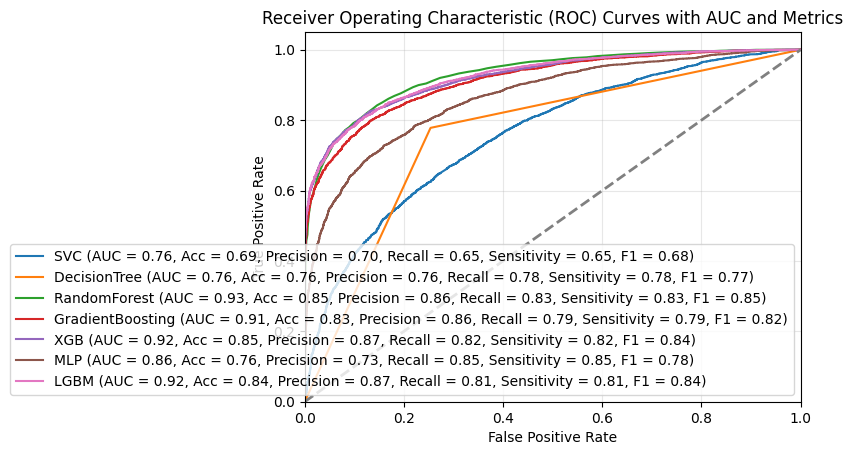

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

selected_classifiers = {
    'SVC': classifiers['SVC'],
    'DecisionTree' : classifiers['DecisionTree'],
    'RandomForest': classifiers['RandomForest'],
    'GradientBoosting': classifiers['GradientBoosting'],
    'XGB': classifiers['XGB'],
    'MLP': classifiers['MLP'],
    'LGBM': classifiers['LGBM']
}

# Define a dictionary to store ROC curve data and other metrics for each classifier
roc_curves_and_metrics = {}

# Loop through selected classifiers
for name, clf in selected_classifiers.items():
    # Perform cross-validation and get predicted probabilities
    y_scores_cv = cross_val_predict(clf, X_train, y_train, cv=kf, method='predict_proba', n_jobs=-1)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_train, y_scores_cv)
    roc_auc = auc(fpr, tpr)

    # Calculate other metrics
    y_pred_cv = (y_scores_cv > 0.5).astype(int)
    accuracy_mean_cv = accuracy_score(y_train, y_pred_cv)
    precision_mean_cv = precision_score(y_train, y_pred_cv)
    recall_mean_cv = recall_score(y_train, y_pred_cv)
    sensitivity_mean_cv = recall_mean_cv  # Sensitivity is the same as Recall
    f1_mean_cv = f1_score(y_train, y_pred_cv)

    # Store ROC curve data and metrics in the dictionary
    roc_curves_and_metrics[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'accuracy_mean_cv': accuracy_mean_cv,
        'precision_mean_cv': precision_mean_cv,
        'recall_mean_cv': recall_mean_cv,
        'sensitivity_mean_cv': sensitivity_mean_cv,
        'f1_mean_cv': f1_mean_cv
    }

# Print cross-validation results
for name, data in roc_curves_and_metrics.items():
    fpr, tpr, roc_auc = data['fpr'], data['tpr'], data['roc_auc']
    accuracy_mean_cv, precision_mean_cv, recall_mean_cv, sensitivity_mean_cv, f1_mean_cv = data['accuracy_mean_cv'], data['precision_mean_cv'], data['recall_mean_cv'], data['sensitivity_mean_cv'], data['f1_mean_cv']

    # Modify the label string to include AUC and other metrics
    label = f'{name} (AUC = {roc_auc:.2f}, Acc = {accuracy_mean_cv:.2f}, Precision = {precision_mean_cv:.2f}, Recall = {recall_mean_cv:.2f}, Sensitivity = {sensitivity_mean_cv:.2f}, F1 = {f1_mean_cv:.2f})'

    # Plot the ROC curve (optional, can be removed if not needed)
    plt.plot(fpr, tpr, label=label)

    # Print metrics for cross-validation
    print(f"{name}: CV AUC Mean = {roc_auc:.4f}, "
          f"CV Accuracy Mean = {accuracy_mean_cv:.4f}, "
          f"CV F1 Score Mean = {f1_mean_cv:.4f}, "
          f"CV Precision Mean = {precision_mean_cv:.4f}, "
          f"CV Recall Mean = {recall_mean_cv:.4f}, "
          f"CV Sensitivity Mean = {sensitivity_mean_cv:.4f}")

# Plot the random chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves with AUC and Metrics')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


# **Feature Importance & SHAP Value**

***Feature Importance using best model***

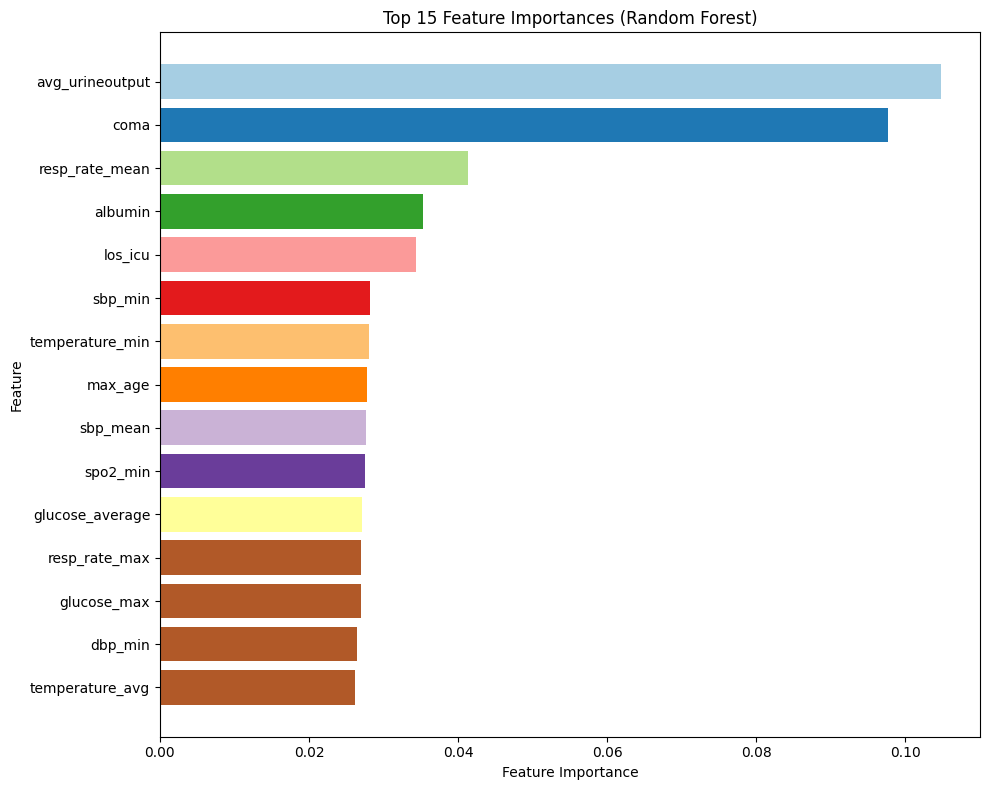

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data (replace X_smote and y_smote with your data)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get the names of the features (replace feature_names with your actual feature names)
feature_names = X_train.columns  # Replace with your feature names

# Sort feature importances and feature names in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx][:15]  # Select the top 15 feature importances
sorted_feature_names = [feature_names[i] for i in sorted_idx][:15]  # Select the corresponding feature names

# Create a vertical bar plot with different colors for each feature
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importances, color=plt.cm.Paired(np.arange(len(sorted_feature_names))))
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.tight_layout()
plt.show()

***SHAP Method***

In [ ]:
model = classifiers['RandomForest'].fit(X_smote, y_smote)

In [ ]:
pip install SHAP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 1827it [15:42,  1.92it/s]


In [ ]:
X_test

,max_age,los_icu,sofa_score,avg_urineoutput,temperature_min,temperature_max,temperature_avg,glucose_min,glucose_max,glucose_average,sodium_max,sodium_min,sodium_average,diabetes_without_cc,diabetes_with_cc,severe_liver_disease,aids,renal_disease,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,spo2_min,spo2_max,spo2_mean,coma,albumin,race_Black or African American,race_Hispanic or Latin,race_Others race,race_White,antibiotic_Aminoglycoside,antibiotic_Carbapenem,antibiotic_Glycopeptide,antibiotic_Oxazolidinone,antibiotic_Penicillin,antibiotic_Sulfonamide,antibiotic_Tetracycline,gender_F,gender_M
4043,78,2.170000,4,122.272727,36.700000,36.700000,36.700000,105.000000,290.000000,183.500000,138.00000,133.000000,135.500000,0,0,0,0,1,65,105,86.350370,8.000000,141.000000,108.645714,1.000000,79.00000,56.747143,7.000000,30.00000,18.442143,93,100,97.827407,0.0,4.500000,0,0,0,1,0,0,1,0,0,0,0,1,0
3573,89,1.920000,3,141.809524,36.800000,37.400000,37.100000,144.000000,144.000000,144.000000,136.00000,136.000000,136.000000,0,0,0,0,0,54,93,69.972222,84.000000,148.000000,111.736842,36.000000,61.00000,45.105263,7.000000,26.00000,14.000000,93,100,99.166667,0.0,4.300000,0,0,0,1,0,0,1,0,0,0,0,1,0
4505,58,5.290000,2,100.333333,38.300000,38.300000,38.300000,83.000000,98.000000,90.500000,140.00000,137.000000,138.500000,0,0,0,0,0,71,100,84.666667,75.000000,129.000000,104.636364,43.000000,98.00000,58.272727,15.000000,29.00000,17.000000,93,100,96.628571,1.0,4.300000,0,0,0,1,0,0,1,0,0,0,0,0,1
6974,82,2.897686,7,34.013407,35.828698,35.828698,35.828698,84.719682,391.152379,237.936031,137.71746,127.145714,132.431587,0,0,0,0,0,76,103,84.349532,81.856508,131.004444,103.753289,41.150158,71.43492,52.112290,13.569524,29.85873,25.250527,85,100,96.489491,0.0,3.114127,0,0,0,1,0,0,0,0,0,0,0,0,1
2881,61,25.170000,7,63.410256,36.700000,36.900000,36.800000,157.000000,260.000000,208.500000,137.00000,135.000000,136.000000,0,0,0,0,1,54,90,68.846154,91.000000,144.000000,114.093750,43.000000,75.00000,58.062500,19.000000,39.00000,34.206897,95,100,98.037037,1.0,2.500000,0,0,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,66,12.710000,3,197.777778,36.700000,36.700000,36.700000,118.000000,152.000000,135.000000,139.00000,138.000000,138.500000,0,0,0,0,0,84,122,98.444444,88.000000,171.000000,121.653846,49.000000,93.00000,60.923077,15.000000,32.00000,17.465517,87,100,98.444444,0.0,4.300000,0,0,0,1,0,0,1,0,0,0,0,1,0
2886,53,6.580000,11,35.045455,38.300000,38.300000,38.300000,89.000000,134.000000,111.500000,137.00000,135.000000,136.000000,0,0,1,0,0,87,102,95.033333,100.000000,151.000000,128.375000,34.000000,60.00000,43.875000,16.000000,28.00000,21.100000,91,100,94.766667,0.0,2.800000,0,0,0,1,0,1,0,0,0,0,0,1,0
3290,72,5.130000,3,178.631579,36.000000,37.200000,36.600000,94.000000,155.000000,124.500000,144.00000,139.000000,141.500000,0,0,0,0,1,74,112,89.800000,88.000000,138.000000,102.928571,44.000000,68.00000,56.107143,15.000000,26.00000,18.428571,96,100,98.200000,1.0,4.900000,0,0,0,1,0,1,0,0,0,0,0,0,1
1835,93,11.580000,3,206.142857,36.200000,38.200000,37.200000,84.000000,150.000000,117.000000,145.00000,139.000000,142.000000,0,0,0,0,0,88,127,102.680000,72.000000,111.000000,92.444444,44.000000,63.00000,53.592593,9.000000,26.00000,23.037037,95,100,97.640000,1.0,3.800000,0,0,1,0,0,0,1,0,0,0,0,0,1


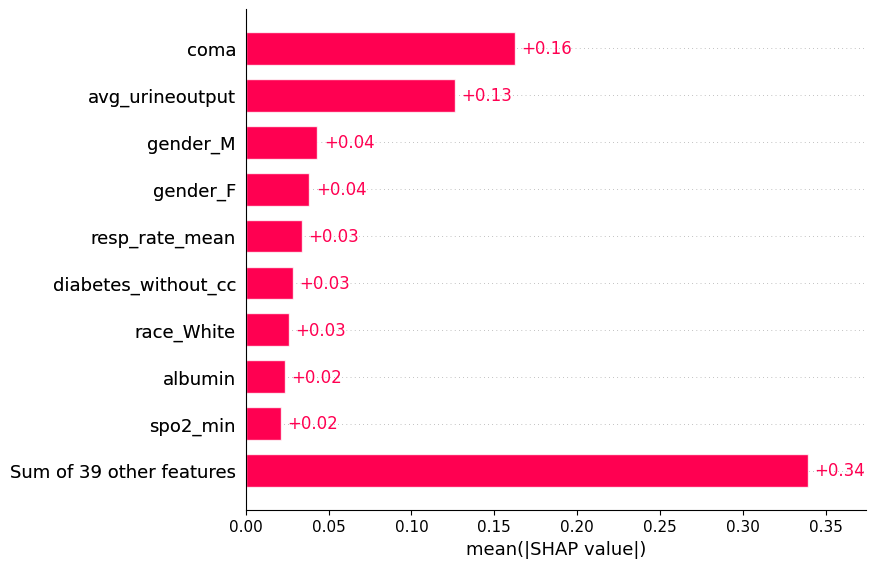

In [ ]:
shap.plots.bar(shap_values)

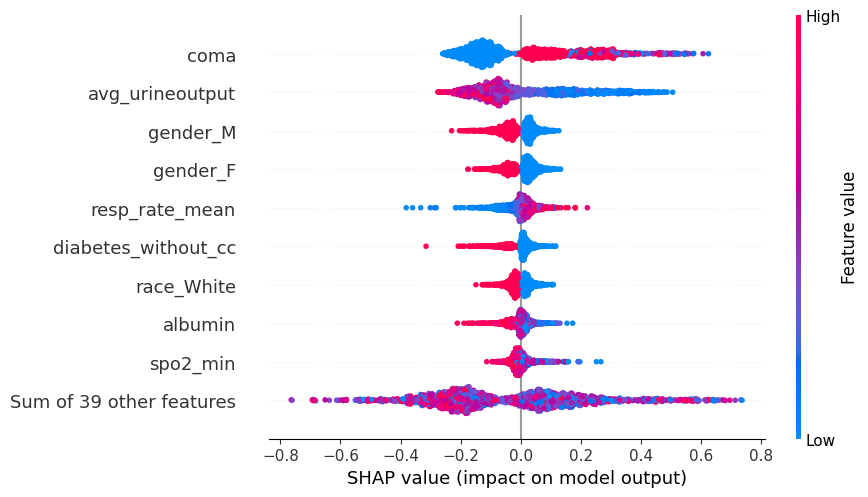

In [ ]:

shap.plots.beeswarm(shap_values)

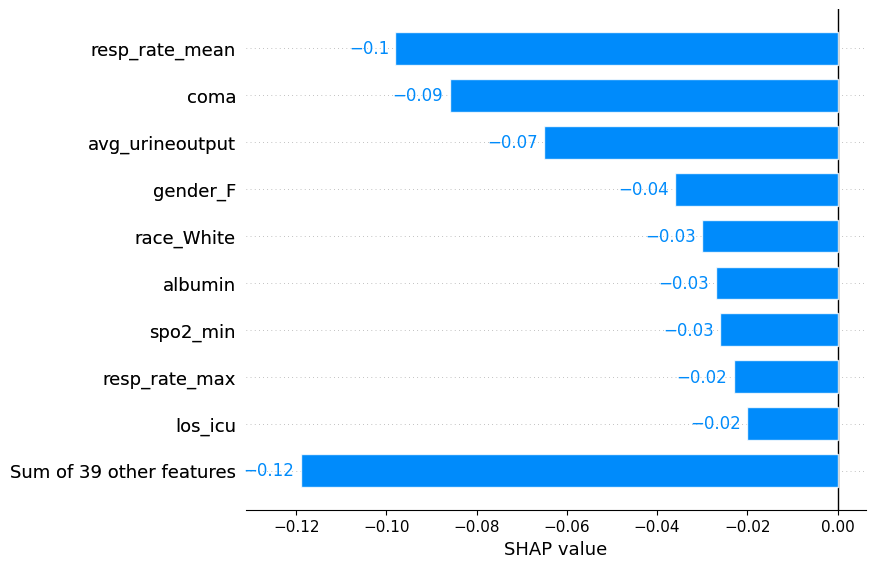

In [ ]:
shap.plots.bar(shap_values[1])

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split

# Assuming df_reduced is already loaded into the workspace

# Split your dataset into a train and test set
train, test = train_test_split(df_reduced, test_size=0.2)  # For example, 80% training, 20% test

# Select the numeric columns you want to compare
numeric_cols = [
    'los_icu', 'max_age', 'sofa_score', 'avg_urineoutput', 'temperature_min',
    'temperature_max', 'temperature_avg', 'glucose_min', 'glucose_max',
    'glucose_average', 'sodium_min', 'sodium_max', 'sodium_average',
    'heart_rate_min', 'heart_rate_max', 'heart_rate_mean', 'sbp_min',
    'sbp_max', 'sbp_mean', 'dbp_min', 'dbp_max', 'dbp_mean', 'resp_rate_min',
    'resp_rate_max', 'resp_rate_mean', 'spo2_min', 'spo2_max', 'spo2_mean'
]

# Initialize a DataFrame to store p-values and means
comparison = pd.DataFrame(index=numeric_cols, columns=['Train Mean', 'Test Mean', 'P-Value'])

# Calculate p-values and means for each variable between train and test sets
for col in numeric_cols:
    train_mean = train[col].dropna().mean()
    test_mean = test[col].dropna().mean()
    p_value = stats.ttest_ind(train[col].dropna(), test[col].dropna(), equal_var=False).pvalue

    comparison.loc[col, 'Train Mean'] = train_mean
    comparison.loc[col, 'Test Mean'] = test_mean
    comparison.loc[col, 'P-Value'] = p_value

# Print the resulting DataFrame with means and p-values
print(comparison)


                 Train Mean   Test Mean   P-Value
los_icu            6.974258    6.977229   0.98958
max_age            65.15957   66.039032   0.08568
sofa_score         4.316992    4.393443  0.304637
avg_urineoutput  160.970729  153.107968  0.007049
temperature_min   36.663145   36.631928  0.478322
temperature_max    37.14918   37.145121  0.919911
temperature_avg   36.906162   36.888525   0.65165
glucose_min      110.363086   111.45121  0.414229
glucose_max      211.147266   214.52459  0.453283
glucose_average  154.669219  156.738707  0.332125
sodium_min       135.375977  135.384856  0.961242
sodium_max       141.557617   141.76815  0.222138
sodium_average   138.499252  138.594931   0.52112
heart_rate_min    70.249414   69.693989  0.271372
heart_rate_max   114.752344  114.909446  0.819382
heart_rate_mean   89.383648   89.530586  0.763218
sbp_min           81.940632   81.595238  0.488982
sbp_max          154.473177  153.932475  0.475455
sbp_mean         114.334401  114.630449  0.494836


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

# Assuming df_reduced is already loaded into the workspace

# Split your dataset into a train and test set
train, test = train_test_split(df_reduced, test_size=0.2)  # For example, 80% training, 20% test

# Select the categorical columns you want to compare
categorical_cols = [
    'hospital_expire_flag','diabetes_without_cc', 'diabetes_with_cc', 'severe_liver_disease','aids',
    'renal_disease','antibiotic_Carbapenem','antibiotic_Aminoglycoside',
    'antibiotic_Glycopeptide','antibiotic_Oxazolidinone','antibiotic_Penicillin',
    'antibiotic_Sulfonamide','antibiotic_Tetracycline','gender_F'
]

# Initialize a DataFrame to store Chi-Square p-values and percentage of ones
comparison = pd.DataFrame(index=categorical_cols, columns=['Chi-Square P-Value', 'Percentage of Ones'])

# Calculate Chi-Square p-values and percentage of ones for each categorical variable between train and test sets
for col in categorical_cols:
    train_values = train[col].value_counts()
    test_values = test[col].value_counts()

    # Create a set of all unique categories across both train and test sets
    all_categories = set(train_values.index) | set(test_values.index)

    # Ensure that both train and test sets have counts for all categories
    train_values = train_values.reindex(all_categories, fill_value=0)
    test_values = test_values.reindex(all_categories, fill_value=0)

    # Create a contingency table
    contingency_table = pd.DataFrame({'Train': train_values, 'Test': test_values})

    # Calculate Chi-Square p-value
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Calculate the percentage of ones in the test set
    total_ones_test = test_values.get(1, 0)
    total_values_test = test_values.sum()
    percentage_ones = (total_ones_test / total_values_test) * 100

    comparison.loc[col, 'Chi-Square P-Value'] = p
    comparison.loc[col, 'Percentage of Ones'] = percentage_ones

# Print the resulting DataFrame with Chi-Square p-values and percentage of ones
print(comparison)


                          Chi-Square P-Value Percentage of Ones
hospital_expire_flag                0.632198          28.103044
diabetes_without_cc                 0.766197          32.474629
diabetes_with_cc                    0.268396          10.850898
severe_liver_disease                0.725528          10.616706
aids                                0.874196           0.936768
renal_disease                       0.849848          27.088212
antibiotic_Carbapenem                0.23454          16.627635
antibiotic_Aminoglycoside           0.498829           7.806401
antibiotic_Glycopeptide             0.781806          64.871194
antibiotic_Oxazolidinone                 1.0           0.156128
antibiotic_Penicillin                    1.0                0.0
antibiotic_Sulfonamide              0.131365            1.17096
antibiotic_Tetracycline                  1.0                0.0
gender_F                            0.011454          45.277127


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

# Assuming df_reduced is already loaded into the workspace

# Split your dataset into a train and test set
train, test = train_test_split(df_reduced, test_size=0.2)  # For example, 80% training, 20% test

# Select the categorical columns you want to compare
categorical_cols = [
    'hospital_expire_flag','diabetes_without_cc', 'diabetes_with_cc', 'severe_liver_disease','aids',
    'renal_disease','antibiotic_Carbapenem','antibiotic_Aminoglycoside',
    'antibiotic_Glycopeptide','antibiotic_Oxazolidinone','antibiotic_Penicillin',
    'antibiotic_Sulfonamide','antibiotic_Tetracycline','gender_F'
]

# Initialize a DataFrame to store Chi-Square p-values and percentage of ones
comparison = pd.DataFrame(index=categorical_cols, columns=['Chi-Square P-Value', 'Percentage of Ones (Train)', 'Percentage of Ones (Test)'])

# Calculate Chi-Square p-values, train percentages of ones, and test percentages of ones for each categorical variable
for col in categorical_cols:
    train_values = train[col].value_counts()
    test_values = test[col].value_counts()

    # Create a set of all unique categories across both train and test sets
    all_categories = set(train_values.index) | set(test_values.index)

    # Ensure that both train and test sets have counts for all categories
    train_values = train_values.reindex(all_categories, fill_value=0)
    test_values = test_values.reindex(all_categories, fill_value=0)

    # Create a contingency table
    contingency_table = pd.DataFrame({'Train': train_values, 'Test': test_values})

    # Calculate Chi-Square p-value
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Calculate the percentage of ones in train and test sets
    train_percentage_ones = (train[col] == 1).sum() / len(train) * 100
    test_percentage_ones = (test[col] == 1).sum() / len(test) * 100

    comparison.loc[col, 'Chi-Square P-Value'] = p
    comparison.loc[col, 'Percentage of Ones (Train)'] = train_percentage_ones
    comparison.loc[col, 'Percentage of Ones (Test)'] = test_percentage_ones

# Print the resulting DataFrame with Chi-Square p-values and percentages of ones in train and test sets
print(comparison)


                          Chi-Square P-Value Percentage of Ones (Train)  \
hospital_expire_flag                0.127392                  28.242188   
diabetes_without_cc                 0.660816                  32.226562   
diabetes_with_cc                    0.968422                       10.0   
severe_liver_disease                0.870858                  10.351562   
aids                                0.878186                   0.996094   
renal_disease                       0.043144                  26.269531   
antibiotic_Carbapenem               0.398905                    15.3125   
antibiotic_Aminoglycoside           0.751494                   7.265625   
antibiotic_Glycopeptide             0.731923                  65.351562   
antibiotic_Oxazolidinone            0.515008                   0.214844   
antibiotic_Penicillin                    1.0                   0.019531   
antibiotic_Sulfonamide              0.098173                   0.898437   
antibiotic_Tetracycline  

In [ ]:
import pandas as pd

# Assuming df_reduced is already loaded into the workspace

# Generate a statistical summary for both numeric and categorical columns
summary = df_reduced.describe(include='all')

# Print the summary statistics
print(summary)


          subject_id  hospital_expire_flag      max_age      los_icu  \
count   6.401000e+03           6401.000000  6401.000000  6401.000000   
unique           NaN                   NaN          NaN          NaN   
top              NaN                   NaN          NaN          NaN   
freq             NaN                   NaN          NaN          NaN   
mean    1.498844e+07              0.286830    65.335573     6.974852   
std     2.901363e+06              0.452317    16.253486     7.450656   
min     1.000188e+07              0.000000    19.000000     1.040000   
25%     1.247654e+07              0.000000    55.000000     2.330000   
50%     1.500950e+07              0.000000    67.000000     4.330000   
75%     1.753774e+07              1.000000    78.000000     8.710000   
max     1.999984e+07              1.000000   100.000000    91.040000   

       first_hosp_stay  suspected_infection   sofa_score sepsis3  \
count             6401               6401.0  6401.000000    6401   